In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('survey_results_public.csv')
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
data.shape

(64461, 61)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [6]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
df = data[['Country','EdLevel','YearsCodePro','Employment','ConvertedComp']]

In [8]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedComp
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [9]:
df = df.rename({'ConvertedComp':'Salary'},axis=1)

In [10]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'Salary'], dtype='object')

In [11]:
df.isnull().sum()

Country           389
EdLevel          7030
YearsCodePro    18112
Employment        607
Salary          29705
dtype: int64

In [12]:
df=df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [13]:
df.isnull().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [16]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'Salary'], dtype='object')

In [17]:
df['Employment'].value_counts()

Employed full-time                                      30019
Independent contractor, freelancer, or self-employed     2998
Employed part-time                                       1008
Name: Employment, dtype: int64

In [18]:
shaped = df[df['Employment']=='Employed full-time']

In [20]:
shaped.shape

(30019, 5)

In [22]:
df=shaped.drop('Employment',axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [23]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [25]:
def digest_categories(categories,cutoff):
    categoricalMap={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categoricalMap[categories.index[i]] = categories.index[i]
        else:
            categoricalMap[categories.index[i]] ='Other'
    return categoricalMap

In [26]:
countryMap = digest_categories(df.Country.value_counts(),400)
print(countryMap)

{'United States': 'United States', 'India': 'India', 'United Kingdom': 'United Kingdom', 'Germany': 'Germany', 'Canada': 'Canada', 'Brazil': 'Brazil', 'France': 'France', 'Spain': 'Spain', 'Australia': 'Australia', 'Netherlands': 'Netherlands', 'Poland': 'Poland', 'Italy': 'Italy', 'Russian Federation': 'Russian Federation', 'Sweden': 'Sweden', 'Turkey': 'Other', 'Israel': 'Other', 'Pakistan': 'Other', 'Switzerland': 'Other', 'Mexico': 'Other', 'Ireland': 'Other', 'Norway': 'Other', 'Ukraine': 'Other', 'Romania': 'Other', 'South Africa': 'Other', 'Czech Republic': 'Other', 'Austria': 'Other', 'Belgium': 'Other', 'Iran': 'Other', 'Portugal': 'Other', 'Denmark': 'Other', 'Finland': 'Other', 'Argentina': 'Other', 'Hungary': 'Other', 'New Zealand': 'Other', 'Greece': 'Other', 'Japan': 'Other', 'Bangladesh': 'Other', 'Bulgaria': 'Other', 'Colombia': 'Other', 'Serbia': 'Other', 'Indonesia': 'Other', 'Philippines': 'Other', 'Nigeria': 'Other', 'Singapore': 'Other', 'Lithuania': 'Other', 'Sri 

In [27]:
df.Country = df['Country'].map(countryMap)

In [28]:
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

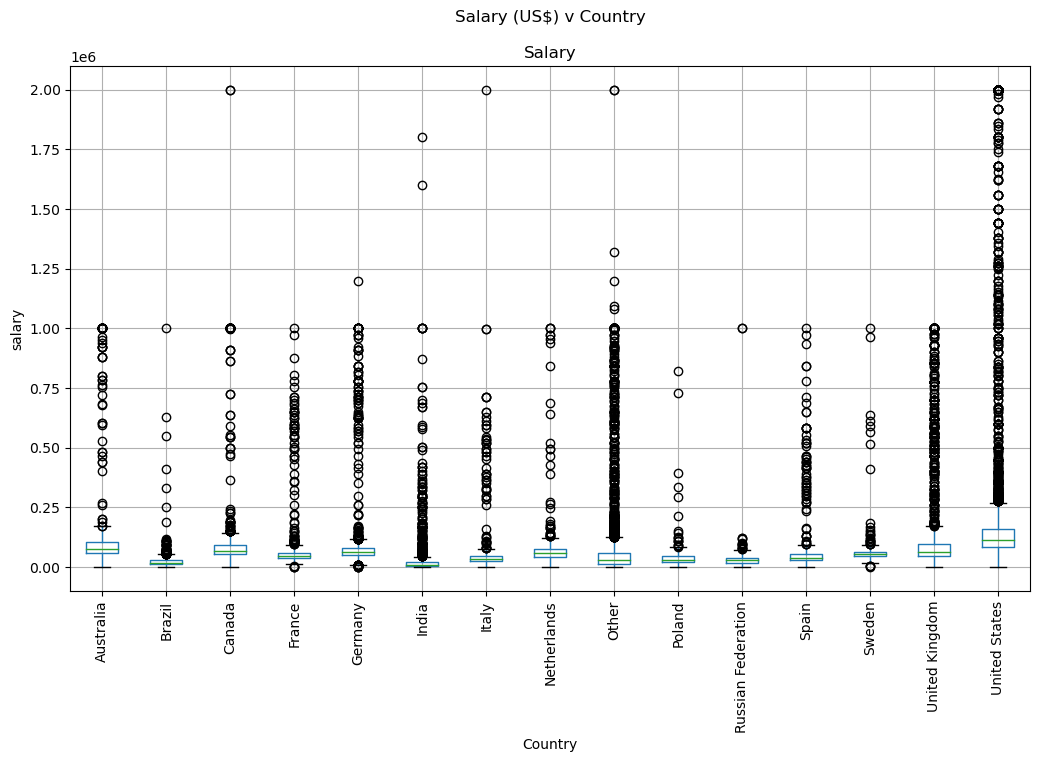

In [34]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

In [35]:
df = df[df['Salary']<=250000]
df = df[df['Salary']> 10000]
df = df[df['Country']!='Other']


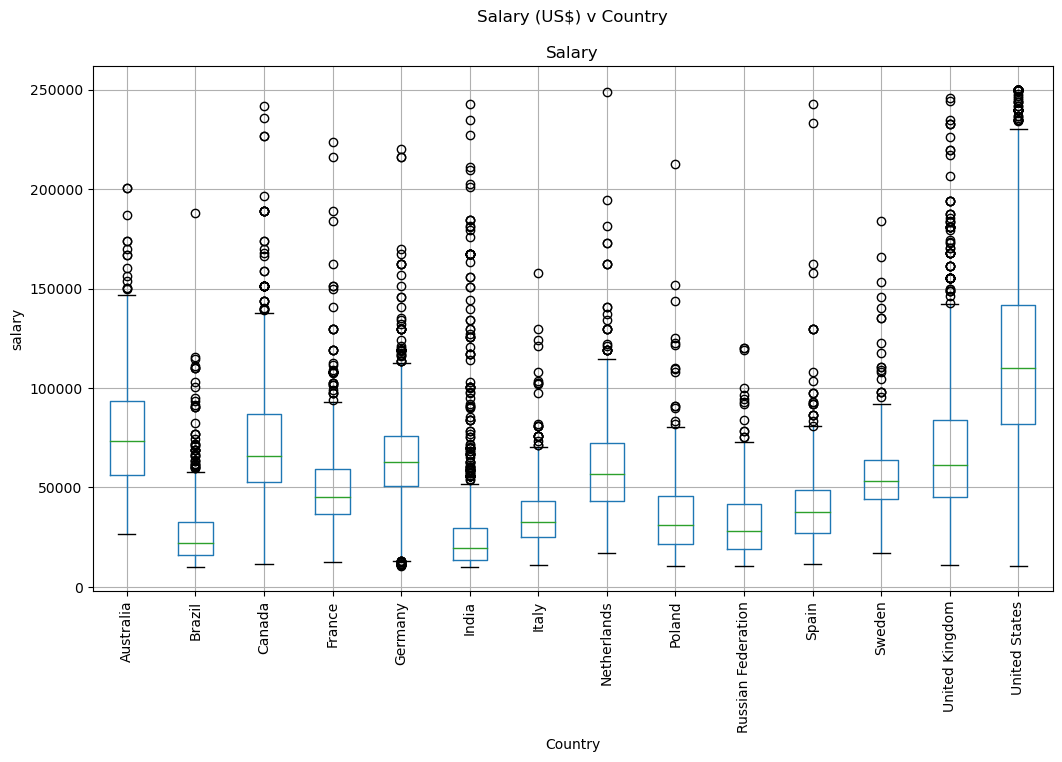

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

In [37]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [38]:
df.YearsCodePro.unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [39]:
def setExperience(i):
    if i == 'More than 50 years':
        return 50
    if i == 'Less than 1 year':
        return 0.5
    return float(i)

In [40]:
df['YearsCodePro']=df['YearsCodePro'].apply(setExperience)

In [41]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18489 entries, 7 to 64129
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       18489 non-null  object 
 1   EdLevel       18489 non-null  object 
 2   YearsCodePro  18489 non-null  float64
 3   Salary        18489 non-null  float64
dtypes: float64(2), object(2)
memory usage: 722.2+ KB


In [43]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [44]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [56]:
def setEducation(i):
    if 'Master’s degree' in i:
        return 'Master’s degree'
    if 'Bachelor’s degree' in i:
        return 'Bachelor’s degree'
    if 'Professional degree' in i or 'Other doctoral degree' in i:
        return 'Post grad'
    return 'Less than a Bachelors'

In [47]:
df['EdLevel'] = df['EdLevel'].apply(setEducation)

In [48]:
df.EdLevel.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
leEducation = LabelEncoder()
df['EdLevel'] = leEducation.fit_transform(df['EdLevel'])

In [51]:
df.EdLevel.unique()

array([0, 2, 1, 3])

In [52]:
leCountry = LabelEncoder()
df['Country'] = leCountry.fit_transform(df['Country'])

In [53]:
df.Country.unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

### Preparation of data to the model

In [54]:
X = df.drop('Salary',axis=1)
y = df['Salary']

### Model Building

In [55]:
from sklearn.linear_model import LinearRegression

In [58]:
model_lr = LinearRegression()
model_lr.fit(X,y)

LinearRegression()

In [59]:
y_pred = model_lr.predict(X)

In [60]:
print(y_pred)

[106030.5804348   82110.95576332  79500.42652681 ...  87522.82740529
 102021.16723047  86846.79025877]


In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
erroRate = np.sqrt(mean_squared_error(y,y_pred))
print(erroRate)

39271.32095686892


### TRy Different Algorithems

Decision tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
model_dt = DecisionTreeRegressor(random_state=0)
model_dt.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [65]:
y_pred = model_dt.predict(X)

In [66]:
erroRateDt = np.sqrt(mean_squared_error(y,y_pred))
print(erroRateDt)

29407.04380620288


### RandomForest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X,y)

RandomForestRegressor(random_state=0)

In [69]:
y_pred = model_rf.predict(X)

In [70]:
erroRateRf = np.sqrt(mean_squared_error(y,y_pred))
print(erroRateRf)

29483.076027121653


### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [76]:
max_depth = [None,2,4,6,8,10,12,14,16]
parameters = {'max_depth':max_depth}

In [77]:
model_dt2 = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(model_dt2, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16]},
             scoring='neg_mean_squared_error')

In [78]:
model_dt3 = gs.best_estimator_

In [79]:
model_dt3.fit(X,y)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [82]:
y_predict = model_dt3.predict(X)

In [83]:
erroRate = np.sqrt(mean_squared_error(y,y_pred))
print(erroRate)

29483.076027121653


In [84]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [88]:
p = np.array([['Germany','Master’s degree',4]])
p

array([['Germany', 'Master’s degree', '4']], dtype='<U15')

In [89]:
p[:,0] = leCountry.transform(p[:,0])
p[:,1] = leEducation.transform(p[:,1])
p = p.astype(float)


In [90]:
p

array([[4., 2., 4.]])

In [91]:
y_pred = model_dt.predict(p)
y_pred

C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([58655.15384615])

## model saving

In [93]:
data = {'model':model_dt,'leCountry':leCountry,'leEducation':leEducation}

In [94]:
import pickle

In [107]:
with open('saveModel.pkl','wb') as file:
    pickle.dump(data,file)

In [108]:
import pickle

try:
    with open('saveModel.pkl', 'rb') as file:
        data = pickle.load(file)
        # Continue with processing the loaded data
except EOFError:
    print("Error: End of file reached. The saved file may be empty.")

In [110]:
    model_loaded = data['model']
    leCountry = data['leCountry']
    leEducation = data['leEducation']

In [111]:
y_pred = model_loaded.predict(p)

C:\Users\NASIM'S PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [112]:
y_pred

array([58655.15384615])